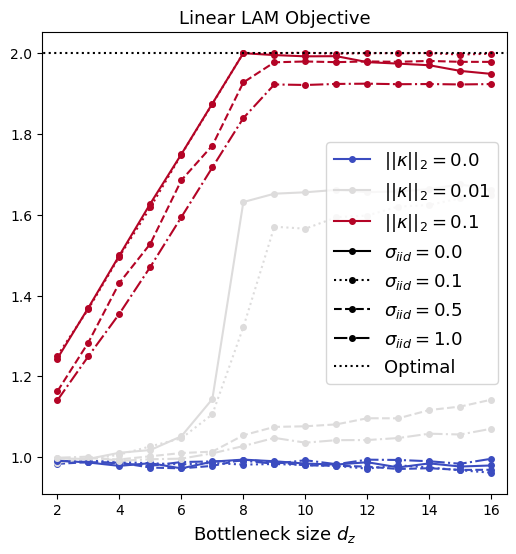

In [1]:
import matplotlib.pyplot as plt
import pandas as pd


total_record = pd.read_csv('scripts/6_learnATrue_CDzeroFalse_psdactionFalse.csv', index_col=0)
total_record = total_record.loc[total_record['kappa_coeff'] < 0.2]
total_record = total_record.loc[total_record['iter'] == 40000]
total_record['LLO'] = - total_record['act_mse'] + total_record['obs_mse'] + 1

# total_record = total_record.loc[total_record['dz'] >= 7]

plt.figure(figsize=(6, 6))

cmap = plt.get_cmap('coolwarm') 
norm = plt.Normalize(vmin=0, vmax=len(total_record.groupby('kappa_coeff')) - 1) 

ls_list = ['solid', 'dotted', 'dashed', 'dashdot']

for ls_id, sigma in enumerate(total_record['sigma'].drop_duplicates().tolist()):
    sigma_record = total_record.loc[total_record['sigma'] == sigma]
    counter = 0
    for kappa, group in sigma_record.groupby('kappa_coeff'):
        sorted_group = group.sort_values('dz')
        if ls_id == 0:
             plt.plot(sorted_group['dz'], sorted_group['LLO'], label=rf'$|| \kappa ||_2 ={kappa}$', ls=ls_list[ls_id], marker='o', markersize=4, color=cmap(norm(counter)))
        else:
             plt.plot(sorted_group['dz'], sorted_group['LLO'], ls=ls_list[ls_id], marker='o', markersize=4, color=cmap(norm(counter)))
        counter += 1

for ls_id, sigma in enumerate(total_record['sigma'].drop_duplicates().tolist()):
     plt.plot([-100, -90], [1, 1], ls=ls_list[ls_id], color='k', marker='o', markersize=4, label=r'$\sigma_{iid}=$'+f'{sigma}')

plt.plot([0, 17], [2, 2], 'k:', label='Optimal')

plt.xlim([1.5, 16.5])
plt.title(r'Linear LAM Objective', fontsize=13)
plt.xlabel('Bottleneck size $d_z$', fontsize=13)
plt.legend(fontsize=13, loc='right')